# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1- Yahia Sherif   46-16162 T-09
  
2- Mohamed Shetewi 46-13908 T-05


### Imports

In [130]:
import pandas as pd
import numpy as np

### 1- Read the data

In [131]:
df = pd.read_csv("AirQualityUCI.csv")
print(df)

           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
9352   4/4/2005  10:00:00     3.1       1314.0       NaN      13.5   
9353   4/4/2005  11:00:00     2.4       1163.0       NaN      11.4   
9354   4/4/2005  12:00:00     2.4       1142.0       NaN      12.4   
9355   4/4/2005  13:00:00     2.1       1003.0       NaN       9.5   
9356   4/4/2005  14:00:00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0  

### 2- Drop unwanted labels

In [132]:
df = df.drop(['CO(GT)','NMHC(GT)', 'C6H6(GT)', 'NOx(GT)'], axis=1)
list(df.columns.values)


['Date',
 'Time',
 'PT08.S1(CO)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

### 3- Handle missing data

In [133]:
df.isna().sum()

Date                0
Time                0
PT08.S1(CO)       366
PT08.S2(NMHC)     366
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [134]:
df.drop(df[df['PT08.S4(NO2)'].isna()].index, inplace=True)
df = df.dropna()
df

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [135]:
df.isna().sum()

Date             0
Time             0
PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### 4- Replace date feature

In [136]:
df[["Month", "Day", "Year"]] = df["Date"].str.split("/", expand = True)
df = df.drop('Date',axis=1)
df

,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Day,Year
0,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,10,2004
1,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,10,2004
2,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,10,2004
3,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,10,2004
4,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,10,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4,4,2005
9353,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4,4,2005
9354,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4,4,2005
9355,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4,4,2005


## 5- Replace time feature

In [137]:
df[["Hour", "Minute", "Second"]] = df["Time"].str.split(":", expand = True)
df = df.drop('Time',axis=1)
df = df.drop('Minute',axis=1)
df = df.drop('Second',axis=1)

In [138]:
df

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Day,Year,Hour
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,10,2004,18
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,10,2004,19
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,10,2004,20
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,10,2004,21
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,10,2004,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4,4,2005,10
9353,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4,4,2005,11
9354,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4,4,2005,12
9355,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4,4,2005,13


In [139]:
df.iloc[0]

PT08.S1(CO)      1360.0
PT08.S2(NMHC)    1046.0
PT08.S3(NOx)     1056.0
NO2(GT)           113.0
PT08.S4(NO2)     1692.0
PT08.S5(O3)      1268.0
T                  13.6
RH                 48.9
AH               0.7578
Month                 3
Day                  10
Year               2004
Hour                 18
Name: 0, dtype: object

### 6- Apply feature scaling

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.drop('NO2(GT)',axis=1)
y = df['NO2(GT)']


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def getPolynomialWithDegree(degree):
    polynomial_converter = PolynomialFeatures(degree=degree,include_bias=False)
    poly_features = polynomial_converter.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train,x_test,y_train,y_test

In [141]:
def doModel(model_name,model,degree):
    # TRAINING ERROR PER DEGREE
    train_rmse_errors = []
    # TEST ERROR PER DEGREE
    test_rmse_errors = []

    x_train,x_test,y_train,y_test = getPolynomialWithDegree(degree)
    model.fit(x_train,y_train)
    print(model_name)
    print("degree = %s" % degree)
    print("alpha = %s" % model.alpha_)
    test_predictions = model.predict(x_test)
    print("Test Set Performance")
    MAE = mean_absolute_error(y_test,test_predictions)
    MSE = mean_squared_error(y_test,test_predictions)
    test_RMSE = np.sqrt(MSE)
    # print("MAE = %s" % MAE)
    # print("MSE = %s" % MSE)
    print("RMSE = %s" % test_RMSE)

    train_predictions = model.predict(x_train)
    print("Training Set Performance")
    MAE = mean_absolute_error(y_train,train_predictions)
    MSE = mean_squared_error(y_train,train_predictions)
    train_RMSE = np.sqrt(MSE)
    print("RMSE = %s" % train_RMSE)

    ratio = None
    if hasattr(model, 'l1_ratio_'):
        ratio = model.l1_ratio_
    return test_RMSE, train_RMSE, model.coef_, model.alpha_, ratio

### 7- Evaluate different degrees of lasso CV polynomial regression




In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV
def doLassoCV(degree):
    return doModel("LassoCV",LassoCV(eps=0.1,n_alphas=100,cv=5,max_iter=100000),degree)


In [ ]:
lasso_test_RMSE = []
lasso_train_RMSE = []
lasso_coef = []
lasso_alpha = []

for i in range(1,5):
    test_RMSE, train_RMSE, coef, alpha, ratio = doLassoCV(i)
    lasso_test_RMSE.append(test_RMSE)
    lasso_train_RMSE.append(train_RMSE)    
    lasso_coef.append(coef)
    lasso_alpha.append(alpha)
# doLassoCV(2)

LassoCV
degree = 1
alpha = 3.3928122729437327
Test Set Performance
RMSE = 23.28882199098844
Training Set Performance
RMSE = 23.83523840277192
LassoCV
degree = 2
alpha = 3.3938106840490363
Test Set Performance
RMSE = 22.491865684500674
Training Set Performance
RMSE = 23.253819227337136
LassoCV
degree = 3
alpha = 3.4203762682143113
Test Set Performance
RMSE = 22.502376684441614
Training Set Performance
RMSE = 23.27918551642303
LassoCV
degree = 4
alpha = 3.4204844352613235
Test Set Performance
RMSE = 22.460768605535858
Training Set Performance
RMSE = 23.259956638999924


In [ ]:
lasso_test_RMSE
lasso_train_RMSE

[23.83523840277192, 23.253819227337136, 23.27918551642303, 23.259956638999924]

### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

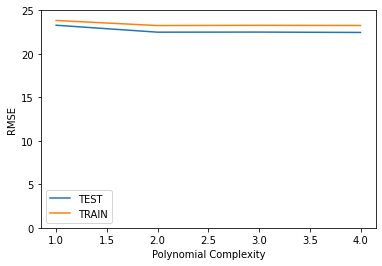

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,5),lasso_test_RMSE,label='TEST')
plt.plot(range(1,5),lasso_train_RMSE,label='TRAIN')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,25)
plt.legend()

In [ ]:
# As shown in the plot, degree 4 is the best model fit
print(lasso_coef[3]) 
print(lasso_test_RMSE[3])
print(lasso_alpha[3])

[ 0.          0.         -7.34335133 ...  0.          0.
  0.        ]
22.460768605535858
3.4204844352613235


### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [ ]:
from sklearn.linear_model import RidgeCV
def doRidgeCV(degree):
    return doModel("Ridge CV", RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error'), degree)

In [ ]:
ridge_test_RMSE = []
ridge_train_RMSE = []
ridge_coef = []
ridge_alpha = []

for i in range(1,5):
    test_RMSE, train_RMSE, coef, alpha, ratio = doRidgeCV(i)
    ridge_test_RMSE.append(test_RMSE)
    ridge_train_RMSE.append(train_RMSE)    
    ridge_coef.append(coef)
    ridge_alpha.append(alpha)
# doLassoCV(2)

Ridge CV
degree = 1
alpha = 1.0
Test Set Performance
RMSE = 22.22581865329533
Training Set Performance
RMSE = 22.104446314771774
Ridge CV
degree = 2
alpha = 0.1
Test Set Performance
RMSE = 18.70860660436676
Training Set Performance
RMSE = 18.310759338531724
Ridge CV
degree = 3
alpha = 0.1
Test Set Performance
RMSE = 17.09051768637183
Training Set Performance
RMSE = 15.659403038696714
Ridge CV
degree = 4
alpha = 0.1
Test Set Performance
RMSE = 17.964610902224027
Training Set Performance
RMSE = 13.503887450140564


### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

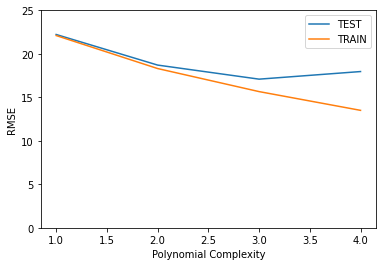

In [ ]:
plt.plot(range(1,5),ridge_test_RMSE,label='TEST')
plt.plot(range(1,5),ridge_train_RMSE,label='TRAIN')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,25)
plt.legend()

In [ ]:
print(ridge_coef[2])
print(ridge_test_RMSE[2])
print(ridge_alpha[2])

[ 1.11610738e+01  2.55564377e+01 -1.54939952e+01 -2.56727328e+01
  2.84074830e+01 -5.98963550e+00  8.61509958e+00  1.19114508e+00
  4.47935429e+00 -2.31281533e+01  2.27173410e+00 -1.44116997e+01
 -1.75552422e+01  7.83861072e+00 -1.31129269e+01 -4.52601778e+01
  6.68980166e+00  1.56483556e+01 -4.67632624e+00 -1.34058940e+01
 -3.21563023e+01  4.43331748e+01  1.11076666e+01 -1.99016493e+01
 -2.91690501e+01 -2.33429139e+00 -3.19770867e+00  9.47188523e+00
  2.10864331e+01  1.04113567e+01 -6.53467029e+00  4.35726517e+01
 -2.81920052e-01  2.54313712e+01 -2.32018047e+01  3.53406007e+01
  7.76616116e+00 -3.86220843e+00 -7.12595287e+00 -1.07016834e+01
 -1.82707759e+01  1.11795874e+01  2.33285204e+01 -1.53851737e+01
  2.17731934e+01  4.76672862e+00 -3.72282538e+01  2.74179849e+01
  1.12365294e+01  1.62948913e+01  1.02482861e+01 -8.89369852e+00
 -2.57377060e+01  3.71152029e+01 -1.12080701e+01 -4.98613186e+01
 -6.39486030e+00 -1.82570154e+01 -3.95226741e+00  1.09397217e+00
  2.85224972e+01  1.39489

### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [143]:
from sklearn.linear_model import ElasticNetCV
def doElasticNetCV(degree):
    return doModel("ElasticNet CV", ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,max_iter=10000), degree)


In [144]:
elastic_test_RMSE = []
elastic_train_RMSE = []
elastic_coef = []
elastic_alpha = []
elastic_ratio = []

for i in range(1,5):
    test_RMSE, train_RMSE, coef, alpha, ratio = doElasticNetCV(i)
    elastic_test_RMSE.append(test_RMSE)
    elastic_train_RMSE.append(train_RMSE)    
    elastic_coef.append(coef)
    elastic_alpha.append(alpha)
    elastic_ratio.append(ratio)

ElasticNet CV
degree = 1
alpha = 0.033928122729437335
Test Set Performance
RMSE = 22.170035123388182
Training Set Performance
RMSE = 22.111109758596253
ElasticNet CV
degree = 2
alpha = 0.033938106840490354
Test Set Performance
RMSE = 19.314169205987824
Training Set Performance
RMSE = 19.110038213139543
ElasticNet CV
degree = 3
alpha = 0.03420376268214311
Test Set Performance
RMSE = 18.131753096320043
Training Set Performance
RMSE = 17.5870131753047
ElasticNet CV
degree = 4
alpha = 0.034204844352613235
Test Set Performance
RMSE = 17.511036065955878
Training Set Performance
RMSE = 16.857826146653956


### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

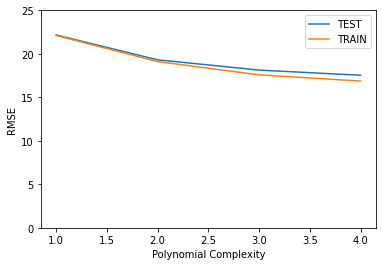

In [126]:
plt.plot(range(1,5),elastic_test_RMSE,label='TEST')
plt.plot(range(1,5),elastic_train_RMSE,label='TRAIN')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,25)
plt.legend()

In [129]:
print(elastic_coef[3])
print(elastic_test_RMSE[3])
print(elastic_ratio[3])

[ 19.69277636  20.65361979 -11.15686078 ...   6.31738213  -0.
  -2.56201443]
17.53879794155433
1.0


### 11- Compare the errors from the 3 regularization techniques, and save the best model.

In [ ]:
from joblib import dump

degree = 3

model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
polynomial_converter = PolynomialFeatures(degree=degree,include_bias=False)
poly_features = polynomial_converter.fit_transform(x)
scaler = StandardScaler()
scaler.fit(poly_features)
poly_features = scaler.transform(poly_features)

model.fit(poly_features, y.values)

dump(model, 'air_quality_poly.joblib')
dump(polynomial_converter, 'polynomial_converter.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
sample = [pd.Series({
    'PT08.S1(CO)':      1360.0,
    'PT08.S2(NMHC)':    1046.0,
    'PT08.S3(NOx)':     1056.0,
    'PT08.S4(NO2)':     1692.0,
    'PT08.S5(O3)':      1268.0,
    'T':                  13.6,
    'RH':                 48.9,
    'AH':               0.7578,
    'Month':                 3,
    'Day':                  10,
    'Year':               2004,
    'Hour':                 18,
})]
sample = polynomial_converter.transform(sample)
sample = scaler.transform(sample)
model.predict(sample)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


array([130.63615715])

### 12- Load the best model and test it on a sample that you manually created it.

In [ ]:
from joblib import load
loaded_model = load('air_quality_poly.joblib')
loaded_poly_converter = load('polynomial_converter.joblib')
loaded_scaler = load('scaler.joblib')

In [ ]:
new_sample = [pd.Series({
    'PT08.S1(CO)':      1360.0,
    'PT08.S2(NMHC)':    1046.0,
    'PT08.S3(NOx)':     1056.0,
    'PT08.S4(NO2)':     1692.0,
    'PT08.S5(O3)':      1268.0,
    'T':                  13.6,
    'RH':                 48.9,
    'AH':               0.7578,
    'Month':                 3,
    'Day':                  10,
    'Year':               2004,
    'Hour':                 18,
})]


In [ ]:
converted_sample = loaded_poly_converter.transform(new_sample)
converted_sample = loaded_scaler.transform(converted_sample)
loaded_model.predict(converted_sample)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


array([130.63615715])

## Great work!
----